In [2]:
import pickle
import torch

with open('output_features_10000.pkl', 'rb') as f:
    loaded_features = pickle.load(f)
    loaded_features = torch.from_numpy(loaded_features)
loaded_features = torch.squeeze(loaded_features)

print(loaded_features.shape)

import torch 
import numpy as np

loaded_feature_numpy = loaded_features.cpu().numpy()

print(loaded_feature_numpy)

torch.Size([10000, 512])
[[1.24868727e+00 9.05970111e-02 1.74322519e-02 ... 4.36703652e-01
  1.19415894e-01 7.16730431e-02]
 [1.61286905e-01 2.20503774e-03 0.00000000e+00 ... 8.34551975e-02
  6.36442610e-06 8.68088230e-02]
 [2.34837290e-02 1.55403137e+00 0.00000000e+00 ... 3.31649929e-02
  1.94804639e-01 8.79549310e-02]
 ...
 [1.75625265e-01 1.74424183e-02 0.00000000e+00 ... 5.16784117e-02
  4.00142781e-02 4.16056842e-01]
 [1.10744769e-02 0.00000000e+00 1.45600331e+00 ... 5.88599503e-01
  2.65733695e+00 0.00000000e+00]
 [5.52536130e-01 3.99325043e-02 0.00000000e+00 ... 6.13866411e-02
  1.19492747e-02 5.01673102e-01]]


In [3]:
ground_truth=[]
for i in range(1000):
    ground_truth.append(1)
for i in range(1000):
    ground_truth.append(2)
for i in range(1000):
    ground_truth.append(3)
for i in range(1000):
    ground_truth.append(4)
for i in range(1000):
    ground_truth.append(5)
for i in range(1000):
    ground_truth.append(6)
for i in range(1000):
    ground_truth.append(7)
for i in range(1000):
    ground_truth.append(8)
for i in range(1000):
    ground_truth.append(9)
for i in range(1000):
    ground_truth.append(10)

print(len(ground_truth))


10000


/home/zach/.conda/envs/pytest5/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


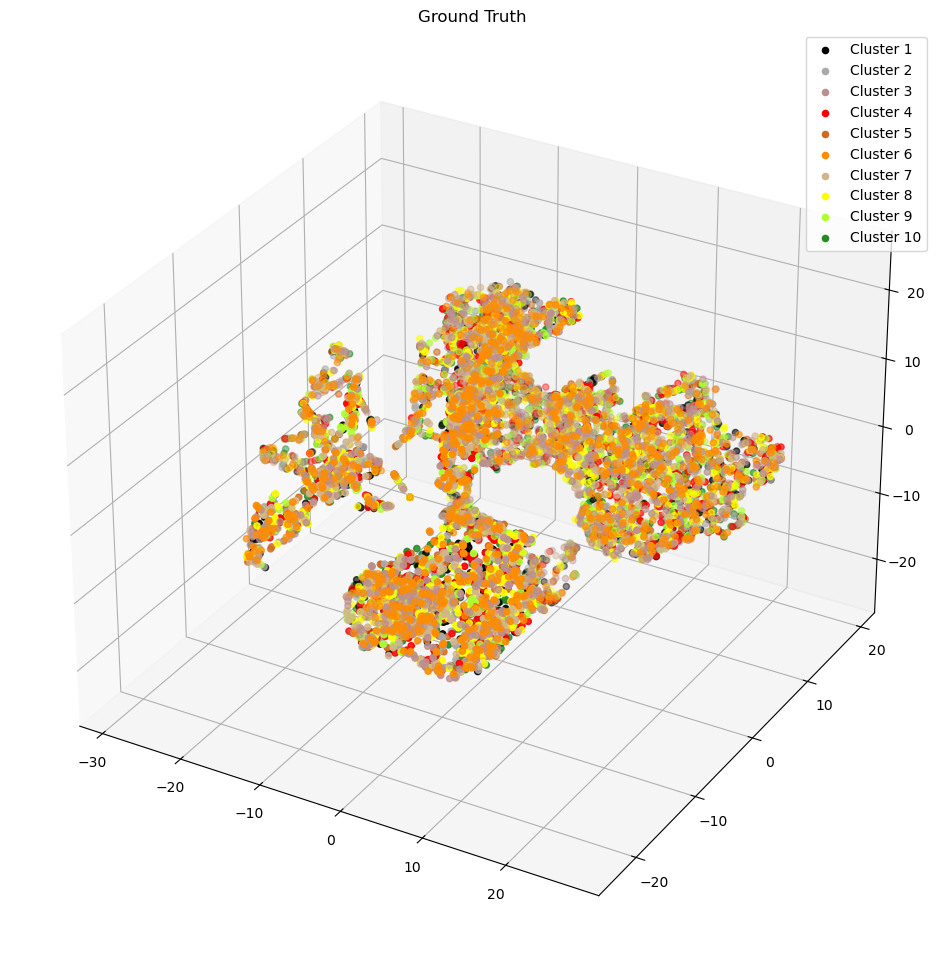

In [6]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters)
labels = kmeans.fit_predict(loaded_feature_numpy)

tsne = TSNE(n_components=3)
data_pca = tsne.fit_transform(loaded_feature_numpy)

labels = [item+1 for item in labels]

# 画出原始数据的3D散点图
plt.figure(figsize=(12, 12))
n_colors = 10
ax = plt.axes(projection='3d')
cluster_colors = ['black', 'darkgray', 'rosybrown', 'red', 'chocolate',
                'darkorange','tan','yellow','greenyellow','forestgreen',
                 ]
unique_labels = np.unique(ground_truth)
for i, label in enumerate(unique_labels):
    cluster_mask = (ground_truth == label)
    ax.scatter(
        data_pca[cluster_mask, 0],
        data_pca[cluster_mask, 1],
        data_pca[cluster_mask, 2],
        label=f'Cluster {label}',
        color=cluster_colors[i % n_colors]  # Use custom colors from the list
    )
plt.title('Ground Truth')
plt.legend()
plt.show()


/home/zach/.conda/envs/pytest5/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


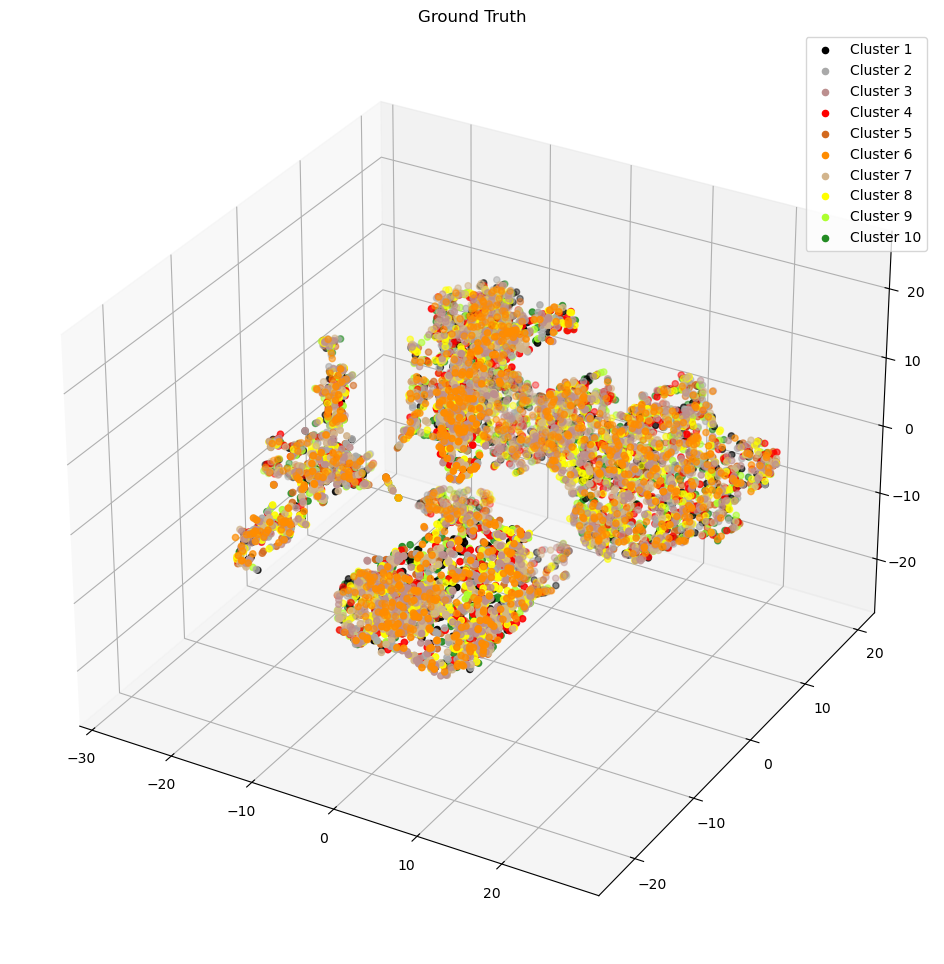

In [7]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters)
labels = kmeans.fit_predict(loaded_feature_numpy)

tsne = TSNE(n_components=3)
data_pca = tsne.fit_transform(loaded_feature_numpy)

labels = [item+1 for item in labels]

# 画出原始数据的3D散点图
plt.figure(figsize=(12, 12))
n_colors = 10
ax = plt.axes(projection='3d')
cluster_colors = ['black', 'darkgray', 'rosybrown', 'red', 'chocolate',
                'darkorange','tan','yellow','greenyellow','forestgreen',
                 ]
unique_labels = np.unique(labels)
for i, label in enumerate(unique_labels):
    cluster_mask = (labels == label)
    ax.scatter(
        data_pca[cluster_mask, 0],
        data_pca[cluster_mask, 1],
        data_pca[cluster_mask, 2],
        label=f'Cluster {label}',
        color=cluster_colors[i % n_colors]  # Use custom colors from the list
    )
plt.title('Ground Truth')
plt.legend()
plt.show()